In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
df = pd.read_csv("/kaggle/input/jigsaw-agile-community-rules/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


In [4]:
df.head(3)

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1



**check if the dataset is balanced or not: Checking balance tells you whether you can trust accuracy,and whether you need special handling of minority classes to build a useful moderation model.**


rule_violation
1    1031
0     998
Name: count, dtype: int64
rule_violation
1    50.813208
0    49.186792
Name: proportion, dtype: float64


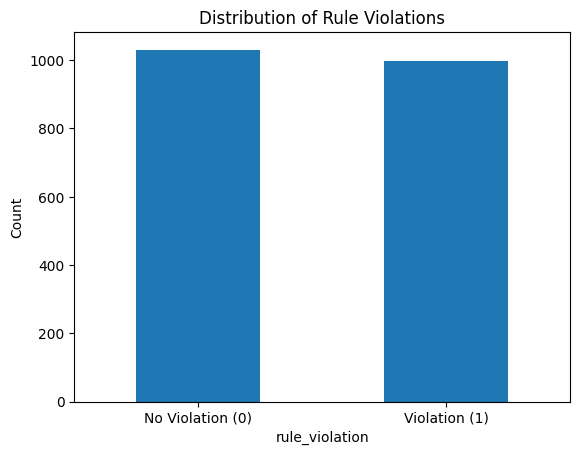

In [5]:
print(df['rule_violation'].value_counts())
print(df['rule_violation'].value_counts(normalize=True) * 100)  # pourcentage

df['rule_violation'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Rule Violations")
plt.show()

**EDA (Exploratory Data Analysis)**

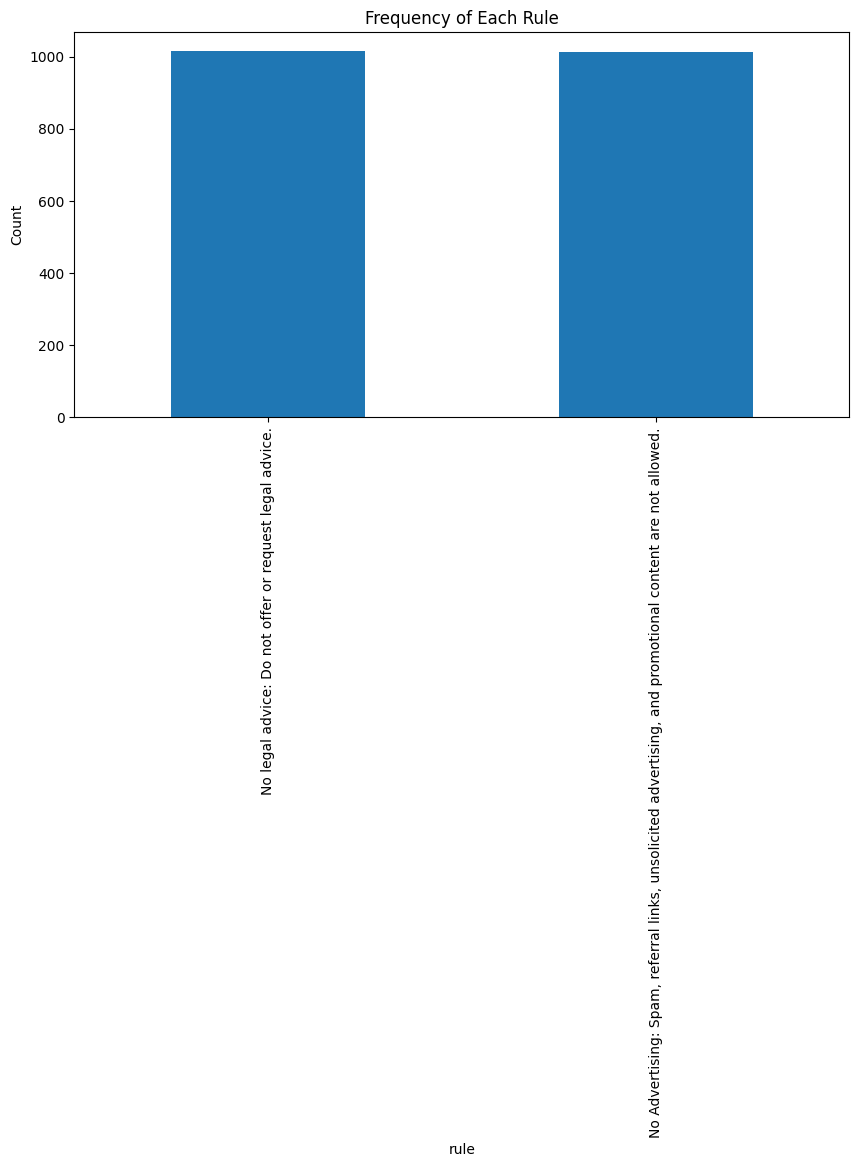

rule
No legal advice: Do not offer or request legal advice.                                                     1017
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    1012
Name: count, dtype: int64
rule
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    0.432806
No legal advice: Do not offer or request legal advice.                                                     0.583088
Name: rule_violation, dtype: float64


In [6]:
rule_counts = df['rule'].value_counts()
plt.figure(figsize=(10,5))
rule_counts.plot(kind='bar')
plt.title("Frequency of Each Rule")
plt.ylabel("Count")
plt.show()

print(rule_counts)

rule_violation_rate = df.groupby('rule')['rule_violation'].mean().sort_values(ascending=True)
print(rule_violation_rate)


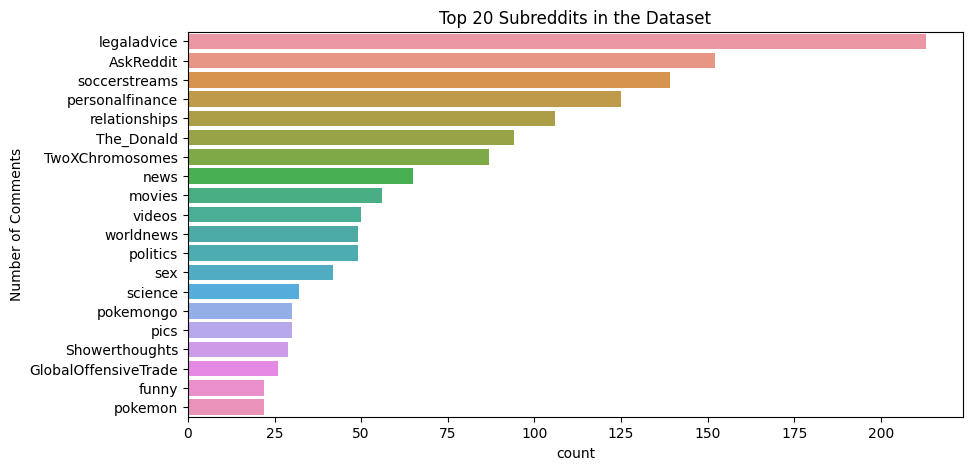

Index(['legaladvice', 'AskReddit', 'soccerstreams', 'personalfinance',
       'relationships', 'The_Donald', 'TwoXChromosomes', 'news', 'movies',
       'videos', 'worldnews', 'politics', 'sex', 'science', 'pokemongo',
       'pics', 'Showerthoughts', 'GlobalOffensiveTrade', 'funny', 'pokemon'],
      dtype='object', name='subreddit')


In [7]:
top_subs = df['subreddit'].value_counts().head(20)
top_subs = df['subreddit'].value_counts().nlargest(20).index
plt.figure(figsize=(10,5))
#top_subs.plot(kind='bar')
sns.countplot(y='subreddit', data=df[df['subreddit'].isin(top_subs)],
              order=top_subs)
plt.title("Top 20 Subreddits in the Dataset")
plt.ylabel("Number of Comments")
plt.show()
print(top_subs)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


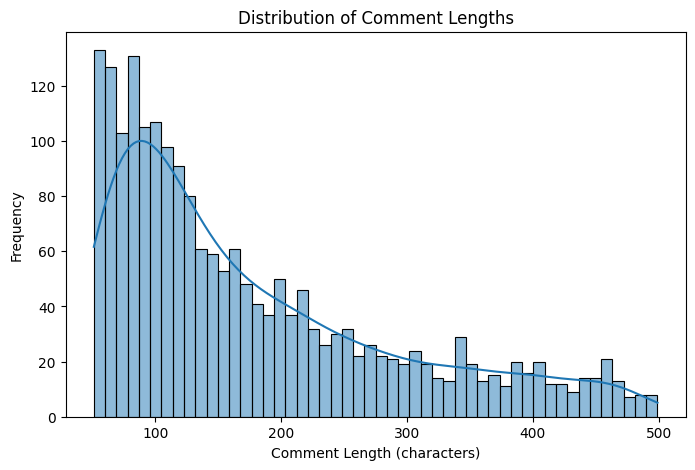


 Average comment length: 176.84277969443076


In [8]:
df['body_length'] = df['body'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,5))
sns.histplot(df['body_length'], bins=50, kde=True)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()


print("\n Average comment length:", df['body_length'].mean())

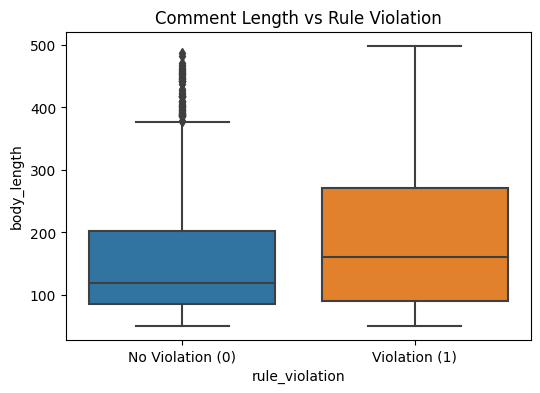

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='rule_violation', y='body_length', data=df)
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'])
plt.title("Comment Length vs Rule Violation")
plt.show()

In [10]:
print("\nUnique rules:", df['rule'].nunique())
print("Unique subreddits:", df['subreddit'].nunique())


Unique rules: 2
Unique subreddits: 100


In [11]:
duplicate_count = df.duplicated(subset=['body']).sum()
print(f"\nDuplicated comment bodies: {duplicate_count}")


Duplicated comment bodies: 160



Average words per comment: 27.96303597831444


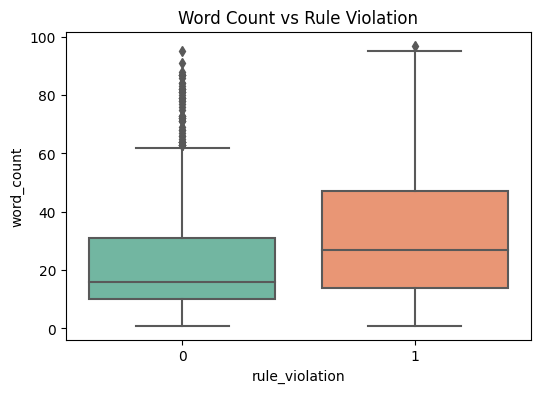

In [12]:
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
print("\nAverage words per comment:", df['word_count'].mean())

plt.figure(figsize=(6,4))
sns.boxplot(x='rule_violation', y='word_count', data=df, palette="Set2")
plt.title("Word Count vs Rule Violation")
plt.show()

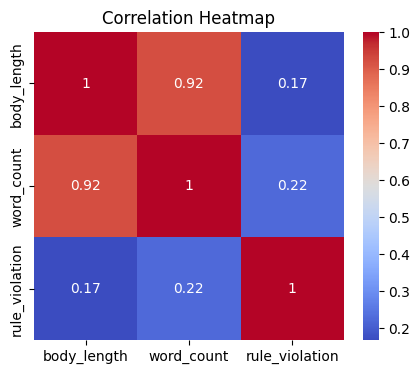

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['body_length', 'word_count', 'rule_violation']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
